# Project 1

## Group partner: Jack Stoetzel

## Dataset: Population by country - 2020 - Url: [Link](https://kaggle.com/tanuprabhu/population-by-country-2020)

In [118]:
from matplotlib import pyplot
import seaborn as sns # Scatter plot lin reg.
import pandas as pd
import numpy as np
import pylab as pl

def removePercent(x):
    if x == 'N.A.':
        return 0.00
    else:
        return float(x.strip('%'))/100

def toFloat(x):
    if x == 'N.A.':
        return 0.00
    else:
        return float(x)

WP = pd.read_csv('data/population_by_country_2020.csv', skiprows=[0], header = None, skipinitialspace = True, converters={'yr-chng':removePercent, 'fert-rate':toFloat, 'urb-pop':removePercent, 'med-age':toFloat},
                names = ['country', 'pop', 'yr-chng', 'net-chng', 'density', 'area', 'net-migrant', 'fert-rate', 'med-age', 'urb-pop', 'world-%'])


### (a): The population being sampled is: population, population change, and country size/density. The things being measured are countries. Each row is a country.

### (b): The overall thing being measured in this dataset is population of each country, but the combined columns of information can also determine whether a country is developed or not.

### (c): The features are quantitative and continuous.

### (d): The data is incomplete (some NaN values, some missing). In this case, incomplete data could show that the data is much harder to acquire in certain regions or countries.

### (e): These features are chosen to be part of this dataset because when describing a country, typically one would include the population compared to the size. In addition, the features exist in a subset of attributes related to Human Geography. These attributes can tell a lot about a country, such as its stage of development.

### (f): Other features that are not included, but would fit in this dataset are: Gross Domestic Product (GDP), GDP per capita, and perhaps the ratio of currency to the U.S. dollar. These would fit well because people would be able to use this dataset more predominantly for categorizing nations by industrialization and development. It could also be used for further comparisons between other countries - the more data, the better the comparison people can draw from the data.

### (g): When I pivot the World Population with Countries and Net-Migration as columns, it can now represent *unpopular* countries (whether it is due to war, famine, lack or human rights, political/economic instability, or the sheer size of the population). Venezuela is top on this country due to political instability, and lack of food on a large scale; so it is no wonder it lies above many. India is likely number 2 due likely to high population, and Syria is third on the list because it is a war zone.

In [119]:
# (g):
print(WP[['country', 'net-migrant']].sort_values(['net-migrant']).reset_index()) # Is this loss?

     index                   country  net-migrant
0       49                 Venezuela    -653249.0
1        1                     India    -532687.0
2       67                     Syria    -427391.0
3        7                Bangladesh    -369501.0
4        0                     China    -348399.0
5        4                  Pakistan    -233379.0
6       83               South Sudan    -174200.0
7       25                   Myanmar    -163313.0
8       73                  Zimbabwe    -116858.0
9        3                 Indonesia     -98955.0
10      57                 Sri Lanka     -97986.0
11     140               Puerto Rico     -97986.0
12      14                   Vietnam     -80000.0
13      60                   Romania     -73999.0
14      12               Philippines     -67152.0
15      36               Afghanistan     -62920.0
16       9                    Mexico     -60000.0
17       6                   Nigeria     -60000.0
18      17                      Iran     -55000.0


### (h): Fertility Rate and Population Change Yearly (%) are likely related to one anther. For example, the country of Nigeria has a high population and high fertility rate as areas of the nation are undeveloped. One would expect Nigeria to then have a high yearly population change too (or at least positive) (assuming Nigeria does not have political/economic issues). Nigeria's yearly pop change is: 2.58%, and fertility rate is: 5.4 (A single mother will produce 5.4 babies).
   ###    h(i): See below Scatter plot.
   ###    h(ii): Grabbing the yearly change and fertility rate, then attempting to find out whether one *correlates* with the other. If it does, take it a step further to see if one *causes* the other by seeing if it is statistically significant. From the graph, there is an upward trend which leads us to believe both variables have a converse relationship.
   ###    h(iii): There are external inferences that can be made from these two variables. If every mother in a nation were to birth on average > 1 baby, that means the mother will produce two people (replacing her and one more). That means the population increases. Realistically, we would have to take in account males, so really the fertility rate must be higher than >1 to reproduce more than we started with, but it is what it is.

Text(0.5,0.98,'Fertility Rate and Yearly Country Growth Scatter Plot')

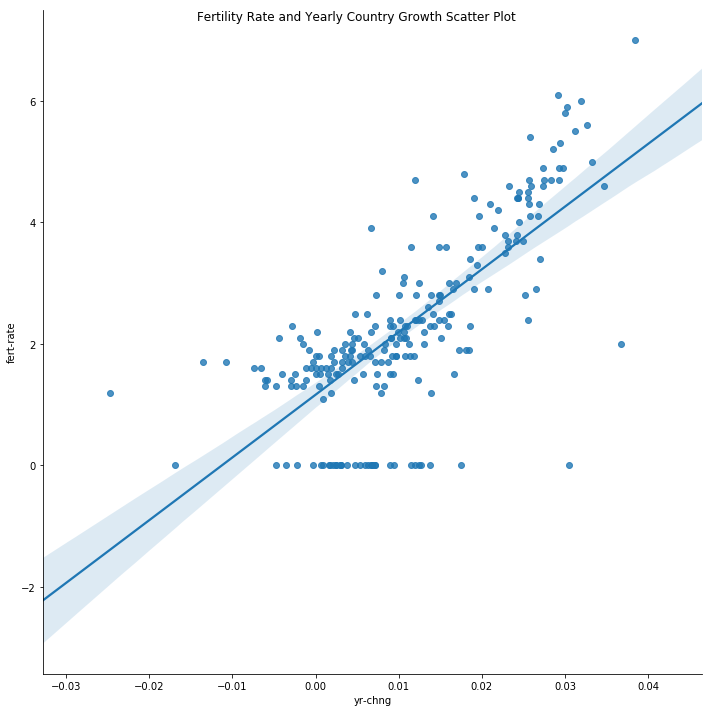

In [120]:
comparison = WP[['fert-rate', 'yr-chng']]
sns.lmplot(x='yr-chng', y='fert-rate', data=comparison, fit_reg=True, height=10)
pl.suptitle('Fertility Rate and Yearly Country Growth Scatter Plot')

### (i): An extra feature that can be sort of determined by the data is the general level of development. If we were to gather the variables `Median Age`, `Fertility Rate`, and `Urban Population`, we could attempt to aggregate them together to form a value that rates the development of each country.
### By getting the mean and quantiles for fertility rates, median ages, and urban population percentage, we can vet the list of countries based on the values proximity to the mean or ??% quantile. Vetting the nations that have LESS THAN OR EQUAL TO 1.7 fertility rate, GREATER THAN OR EQUAL TO 0.78 urban population percentage, and GREATER THAN OR EQUAL TO 37.0 median age produces countries relatively high on the development index.

#### **Countries by Human development index (HDI) (2019):**
**1. Norway✓**<br>
**2. Switzerland**<br>
**3. Ireland**<br>
**4. Germany**<br>
**5. Hong Kong**<br>
**6. Australia**<br>
**7. Iceland**<br>
**8. Sweden**<br>
**9. Singapore**<br>
**10. Netherlands**<br>
**11. Denmark**<br>
**12. Finland✓**<br>
**13. Canada**<br>
**14. New Zealand**<br>
**15. United Kingdom | United States**<br>
**16. Belgium✓**<br>
**17. Liechtenstein**<br>
**18. Japan✓**<br>
**20. Australia**

In [117]:
Development = WP[['country', 'fert-rate', 'med-age', 'urb-pop']]
print(Development.describe(include='all'))
Development = Development[Development['fert-rate'] <= 1.7  ]
Development = Development[Development['urb-pop'] >=    0.78]
Development = Development[Development['med-age'] >=    37.0]

print(Development.sort_values(['fert-rate'], ascending=True))

       country   fert-rate     med-age     urb-pop
count      235  235.000000  235.000000  235.000000
unique     235         NaN         NaN         NaN
top     Bhutan         NaN         NaN         NaN
freq         1         NaN         NaN         NaN
mean       NaN    2.303404   26.178723    0.559574
std        NaN    1.505967   13.697978    0.271779
min        NaN    0.000000    0.000000    0.000000
25%        NaN    1.500000   19.000000    0.365000
50%        NaN    2.000000   28.000000    0.580000
75%        NaN    3.100000   37.500000    0.785000
max        NaN    7.000000   48.000000    1.000000
         country  fert-rate  med-age  urb-pop
27   South Korea        1.1     44.0     0.82
56        Taiwan        1.2     42.0     0.79
29         Spain        1.3     45.0     0.80
86        Greece        1.3     46.0     0.85
10         Japan        1.4     48.0     0.92
38        Canada        1.5     41.0     0.81
115      Finland        1.5     43.0     0.86
168   Luxembourg    